In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import os

os.environ['CUDA_VISIBLE_DEVICES']="0"

from keras.layers import Dense, Input
from keras.models import Model

import omnifold as of
import os
import tensorflow as tf


In [2]:
print("\n\n")
print("  numpy version:  %s" % str(np.version.version) )
print("  tensorflow version:  %s" % str(tf.__version__))
print("\n\n")




  numpy version:  1.21.5
  tensorflow version:  2.11.0





## Set model and resolution parameters

In [3]:
train_mu0 = 0.
train_mu1 = 1.
train_rho01 = -0.6

train_sig0 = 1.0
train_sig1 = 1.5

train_cov00 = train_sig0 * train_sig0 
train_cov11 = train_sig1 * train_sig1
train_cov01 = train_rho01 * train_sig0 * train_sig1

train_cov = np.array( [[train_cov00, train_cov01], [train_cov01, train_cov11]] )
train_mu = np.array( [train_mu0, train_mu1])



true_mu0 = 0.2
true_mu1 = 0.8
true_rho01 = -0.6

true_sig0 = 0.9
true_sig1 = 1.3

true_cov00 = true_sig0 * true_sig0 
true_cov11 = true_sig1 * true_sig1
true_cov01 = true_rho01 * true_sig0 * true_sig1

true_cov = np.array( [[true_cov00, true_cov01], [true_cov01, true_cov11]] )
true_mu = np.array( [true_mu0, true_mu1])



#--- resolution is in same dimensions as features (not sigma/val)
res0 = 0.5
res1 = 0.8




## Plots to visualize these parameter choices

In [4]:

ngen_train = 100000
ngen_true = 10000

train_pts = np.random.multivariate_normal(train_mu, train_cov, size=ngen_train)
true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)

train_det_pts = np.random.normal( train_pts, [res0, res1])

true_det_pts = np.random.normal( true_pts, [res0, res1])



<function matplotlib.pyplot.show(close=None, block=None)>

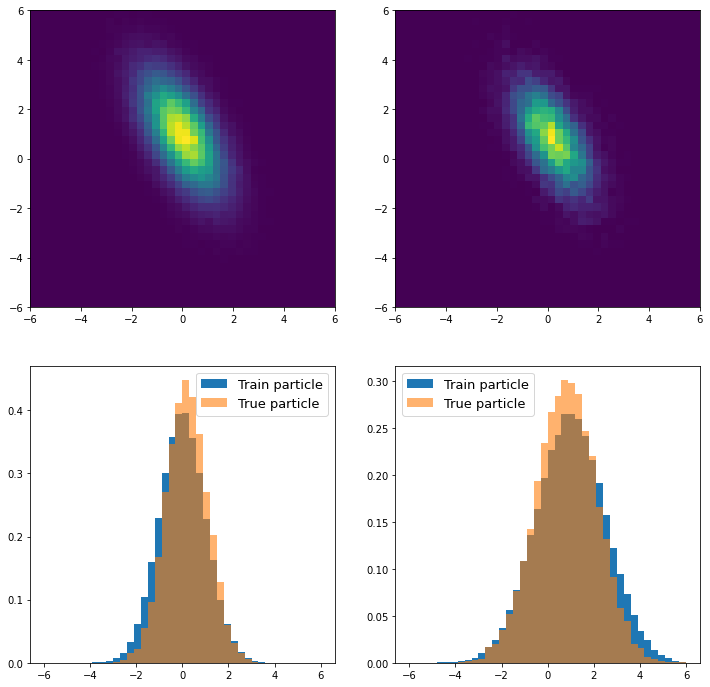

In [5]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='Train particle' )
ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='True particle', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

In [6]:
train_diff = train_det_pts - train_pts

In [7]:
diff_cov = np.cov( train_diff.T )

In [8]:
diff_cov

array([[ 0.24957072, -0.00154008],
       [-0.00154008,  0.64265137]])

In [9]:
np.sqrt(diff_cov[0,0])

0.49957053693330083

In [10]:
np.sqrt(diff_cov[1,1])

0.8016553909859714

<function matplotlib.pyplot.show(close=None, block=None)>

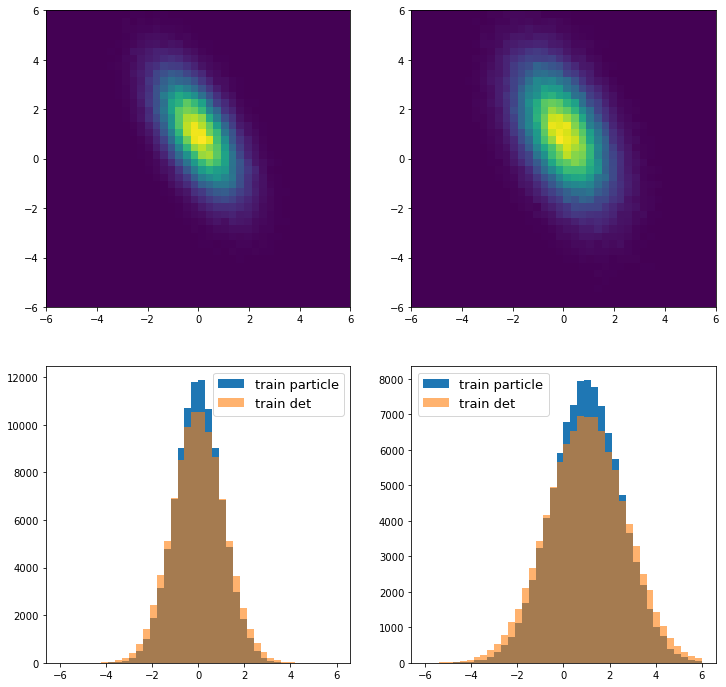

In [11]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_pts[:,0], train_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][0].hist( train_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)

ax[1][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], label='train particle' )
ax[1][1].hist( train_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='train det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

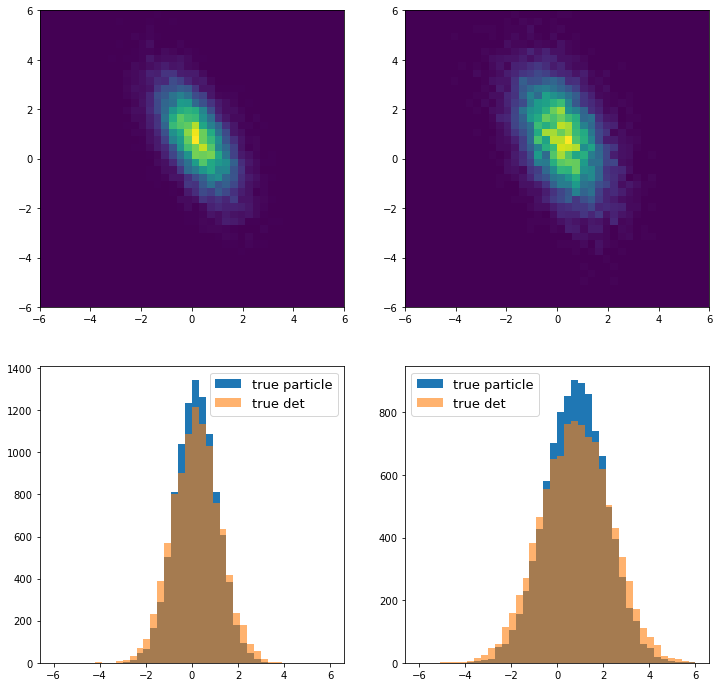

In [12]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( true_pts[:,0], true_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)

ax[1][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], label='true particle' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, range=[hmin,hmax], label='true det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

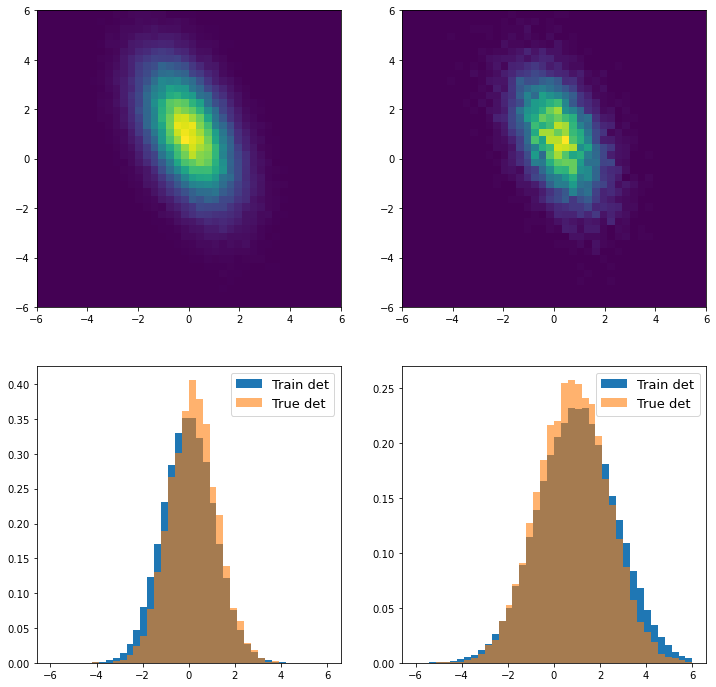

In [13]:
fig,ax = plt.subplots( 2, 2, figsize=(12,12))

hmin=-6
hmax=6
hbins=40

ax[0][0].hist2d( train_det_pts[:,0], train_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[0][1].hist2d( true_det_pts[:,0], true_det_pts[:,1], bins=[hbins,hbins], range=([hmin,hmax],[hmin,hmax]))

ax[1][0].hist( train_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][0].hist( true_det_pts[:,0], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)

ax[1][1].hist( train_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='Train det' )
ax[1][1].hist( true_det_pts[:,1], bins=hbins, density=True, range=[hmin,hmax], label='True det', alpha=0.6)


ax[1][0].legend(loc='best', fontsize=13)
ax[1][1].legend(loc='best', fontsize=13)

plt.show

## Set up NN model for OmniFold

In [14]:
inputs = Input((2, ))
hidden_layer_1 = Dense(50, activation='relu')(inputs)
hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
outputs = Dense(1, activation='sigmoid')(hidden_layer_3)
model = Model(inputs=inputs, outputs=outputs)

2023-10-27 17:04:38.591887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 17:04:38.608438: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 17:04:38.608664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 17:04:38.612244: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-27 17:04:38.612433: I tensorflow/compiler/xla/stream_executo

## Package the training data for OmniFold

In [15]:
train_both = np.stack([train_pts, train_det_pts], axis=1)

## Run OmniFold

In [16]:
%%time


verbose = True

of_niter = 4

of_weights = of.omnifold( train_both, true_det_pts, of_niter, model, verbose)




  shape of theta0_S : (100000, 2)
  shape of theta_unknown_S : (10000, 2)
  shape of xvals_1 :  (110000, 2)



  shape of labels0 : (100000,)
  shape of labels_unknown : (10000,)
  shape of yvals_1 :  (110000,)



  shape of theta0_G : (100000, 2)
  shape of xvals_2 :  (200000, 2)
  shape of yvals_2 :  (200000,)




ITERATION: 1

   -- ITERATION 1  STEP 1

Epoch 1/20


2023-10-27 17:04:40.349133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-27 17:04:40.351432: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7ef1b35d2b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-27 17:04:40.351444: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-10-27 17:04:40.355193: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-27 17:04:40.443853: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 [==============================] - 2s 17ms/step - loss: 0.5639 - accuracy: 0.4579 - val_loss: 0.4768 - val_accuracy: 0.4544
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4340 - accuracy: 0.4546 - val_loss: 0.3821 - val_accuracy: 0.4544
Epoch 3/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3611 - accuracy: 0.4546 - val_loss: 0.3412 - val_accuracy: 0.4544
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3361 - accuracy: 0.4546 - val_loss: 0.3349 - val_accuracy: 0.4544
Epoch 5/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.4546 - val_loss: 0.3288 - val_accuracy: 0.4544
Epoch 6/20
9/9 [==============================] - 0s 4ms/step - loss: 0.3245 - accuracy: 0.4546 - val_loss: 0.3232 - val_accuracy: 0.4544
Epoch 7/20
9/9 [==============================] - 0s 5ms/step - loss: 0.3203 - accuracy: 0.4546 - val_loss: 0.3200 - val_accuracy: 0.4544
Epoch 8/20
9/9 [============================

9/9 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.3911 - val_loss: 0.1291 - val_accuracy: 0.3909
Epoch 19/20
9/9 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.3755 - val_loss: 0.1292 - val_accuracy: 0.3714
Epoch 20/20
10/10 [==============================] - 0s 697us/step

   -- ITERATION 2  STEP 2

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.2074 - accuracy: 0.2516 - val_loss: 0.1664 - val_accuracy: 0.2498
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.2501 - val_loss: 0.1662 - val_accuracy: 0.2498
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.2501 - val_loss: 0.1661 - val_accuracy: 0.2498
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1658 - accuracy: 0.2501 - val_loss: 0.1661 - val_accuracy: 0.2498
Epoch 5/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1658 

75/75 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.2503 - val_loss: 0.1639 - val_accuracy: 0.2492
Epoch 15/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.2503 - val_loss: 0.1640 - val_accuracy: 0.2492
Epoch 16/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.2503 - val_loss: 0.1639 - val_accuracy: 0.2492
Epoch 17/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.2503 - val_loss: 0.1640 - val_accuracy: 0.2492
Epoch 18/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.2503 - val_loss: 0.1639 - val_accuracy: 0.2492
Epoch 19/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1634 - accuracy: 0.2503 - val_loss: 0.1641 - val_accuracy: 0.2492
Epoch 20/20
10/10 [==============================] - 0s 704us/step

ITERATION: 4

   -- ITERATION 4  STEP 1

Epoch 1/20
9/9 [==============================] - 1s 18ms

In [17]:
of_weights

array([[[0.07854801, 0.08991563, 0.12414663, ..., 0.13833015,
         0.11074704, 0.12893414],
        [0.10901397, 0.08479509, 0.12862267, ..., 0.12302078,
         0.11882461, 0.12176508]],

       [[0.88403434, 0.88198012, 0.94531941, ..., 1.01086605,
         1.0578686 , 1.02977705],
        [0.09558602, 0.07187279, 0.12108291, ..., 0.11593417,
         0.12983145, 0.12918881]],

       [[1.03746128, 1.01581752, 1.00667763, ..., 0.98194319,
         0.95503378, 1.0128957 ],
        [0.09786976, 0.07601068, 0.12430679, ..., 0.11575133,
         0.12609737, 0.12491646]],

       [[0.9769336 , 0.96589422, 1.02240884, ..., 1.0113517 ,
         1.00037587, 1.03228951],
        [0.10034399, 0.07074416, 0.12473394, ..., 0.11414599,
         0.13142234, 0.1340342 ]]])

In [18]:
np.shape( of_weights)

(4, 2, 100000)

<function matplotlib.pyplot.show(close=None, block=None)>

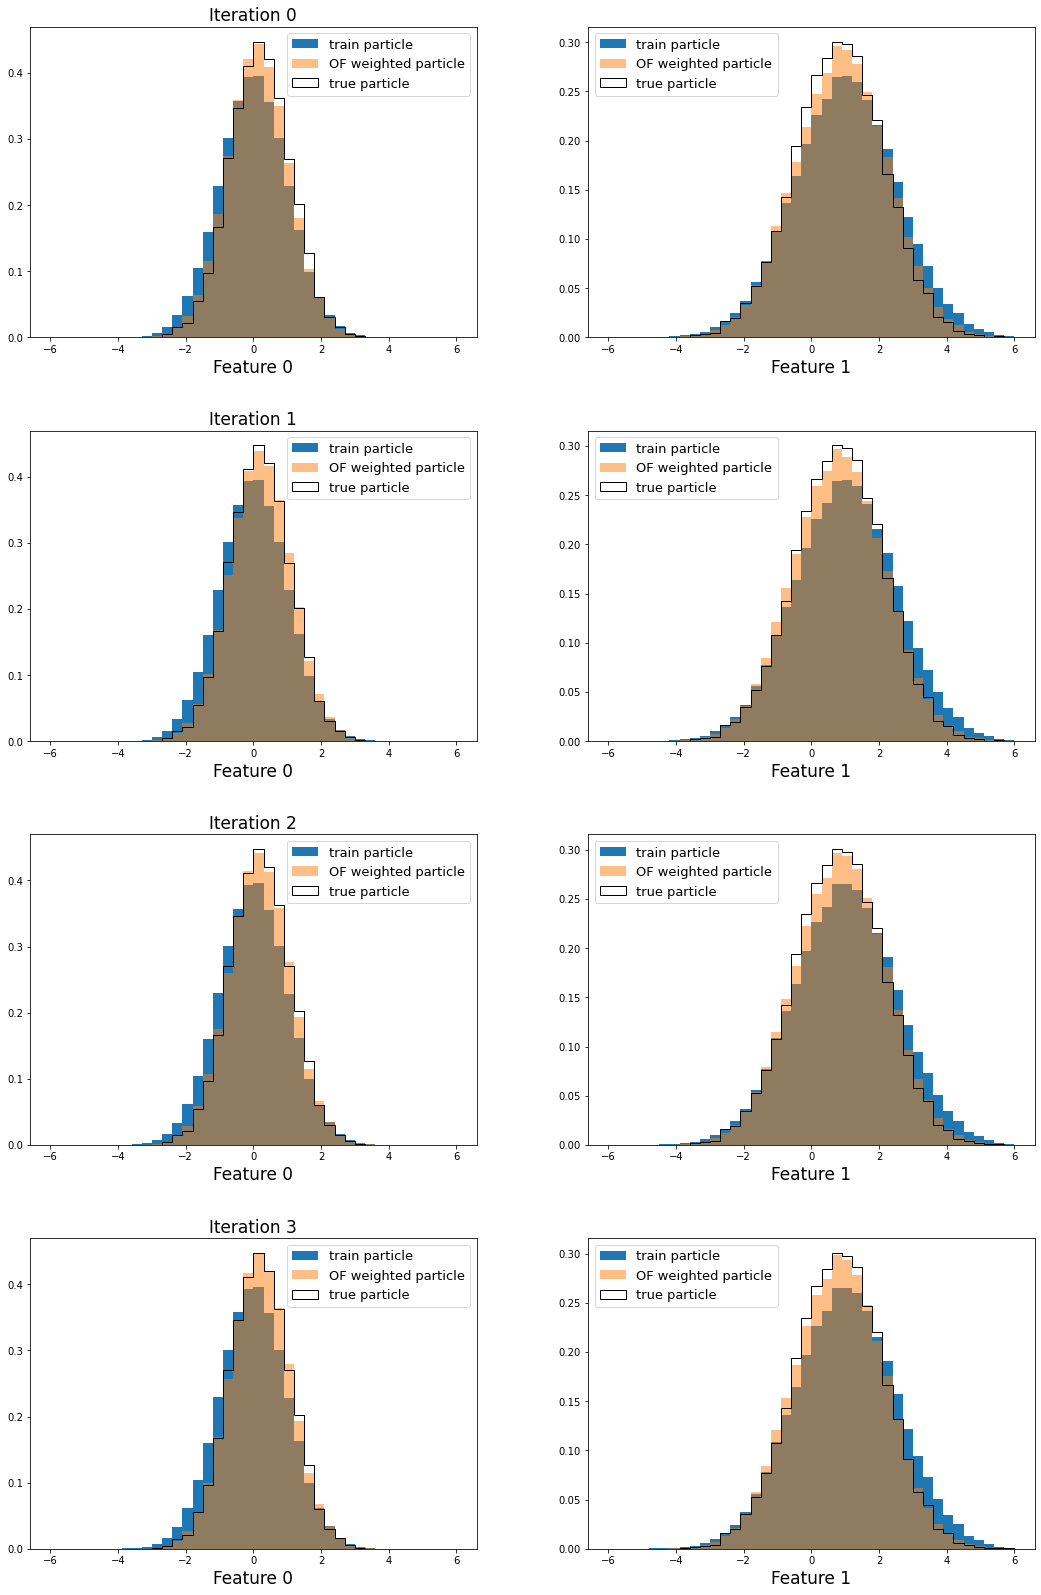

In [19]:


fig,ax = plt.subplots( of_niter, 2, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)



for ofi in range(0,of_niter) :

    ax[ofi][0].hist( train_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][0].hist( train_pts[:,0], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][0].hist( true_pts[:,0], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )

    ax[ofi][1].hist( train_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='train particle' )
    ax[ofi][1].hist( train_pts[:,1], weights=of_weights[ofi,1,:], bins=hbins, range=[hmin,hmax], density=True, label='OF weighted particle', alpha=0.5 )
    ax[ofi][1].hist( true_pts[:,1], bins=hbins, range=[hmin,hmax], density=True, label='true particle', histtype='step', color='black' )


    ax[ofi][0].legend(loc='best', fontsize=13)
    ax[ofi][1].legend(loc='best', fontsize=13)
    
    
    ax[ofi][0].set_xlabel('Feature 0', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel('Feature 1', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )



plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

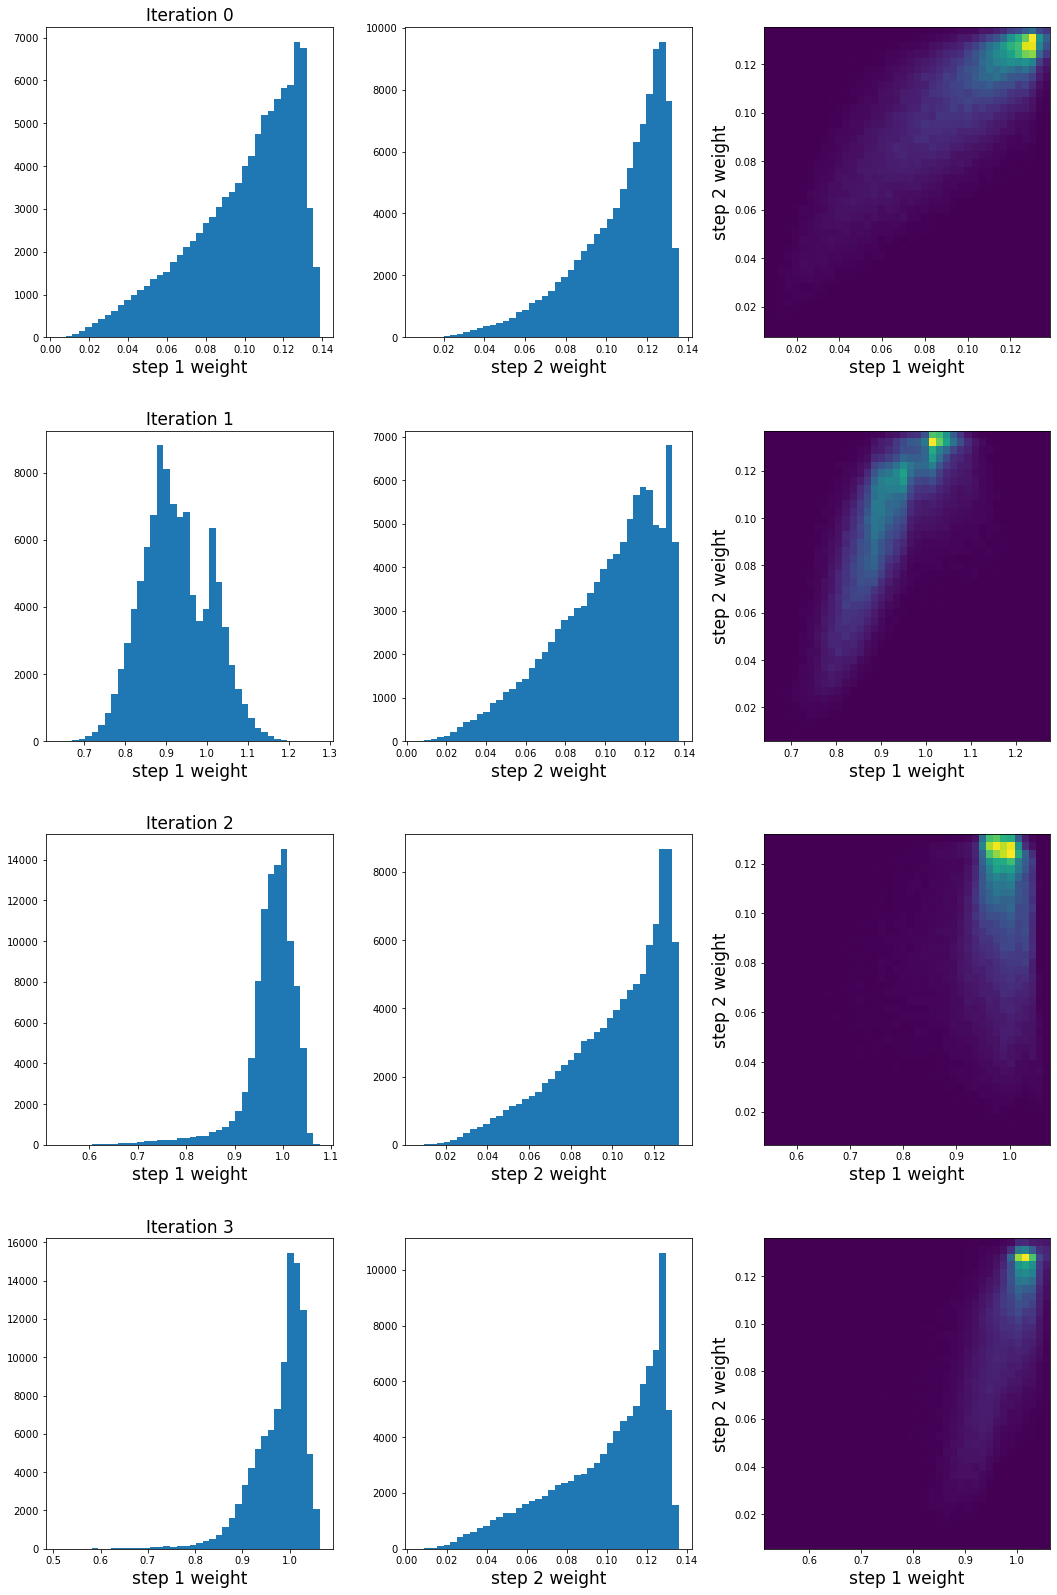

In [20]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist( of_weights[ofi,0,:], bins=hbins )
    ax[ofi][1].hist( of_weights[ofi,1,:], bins=hbins )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

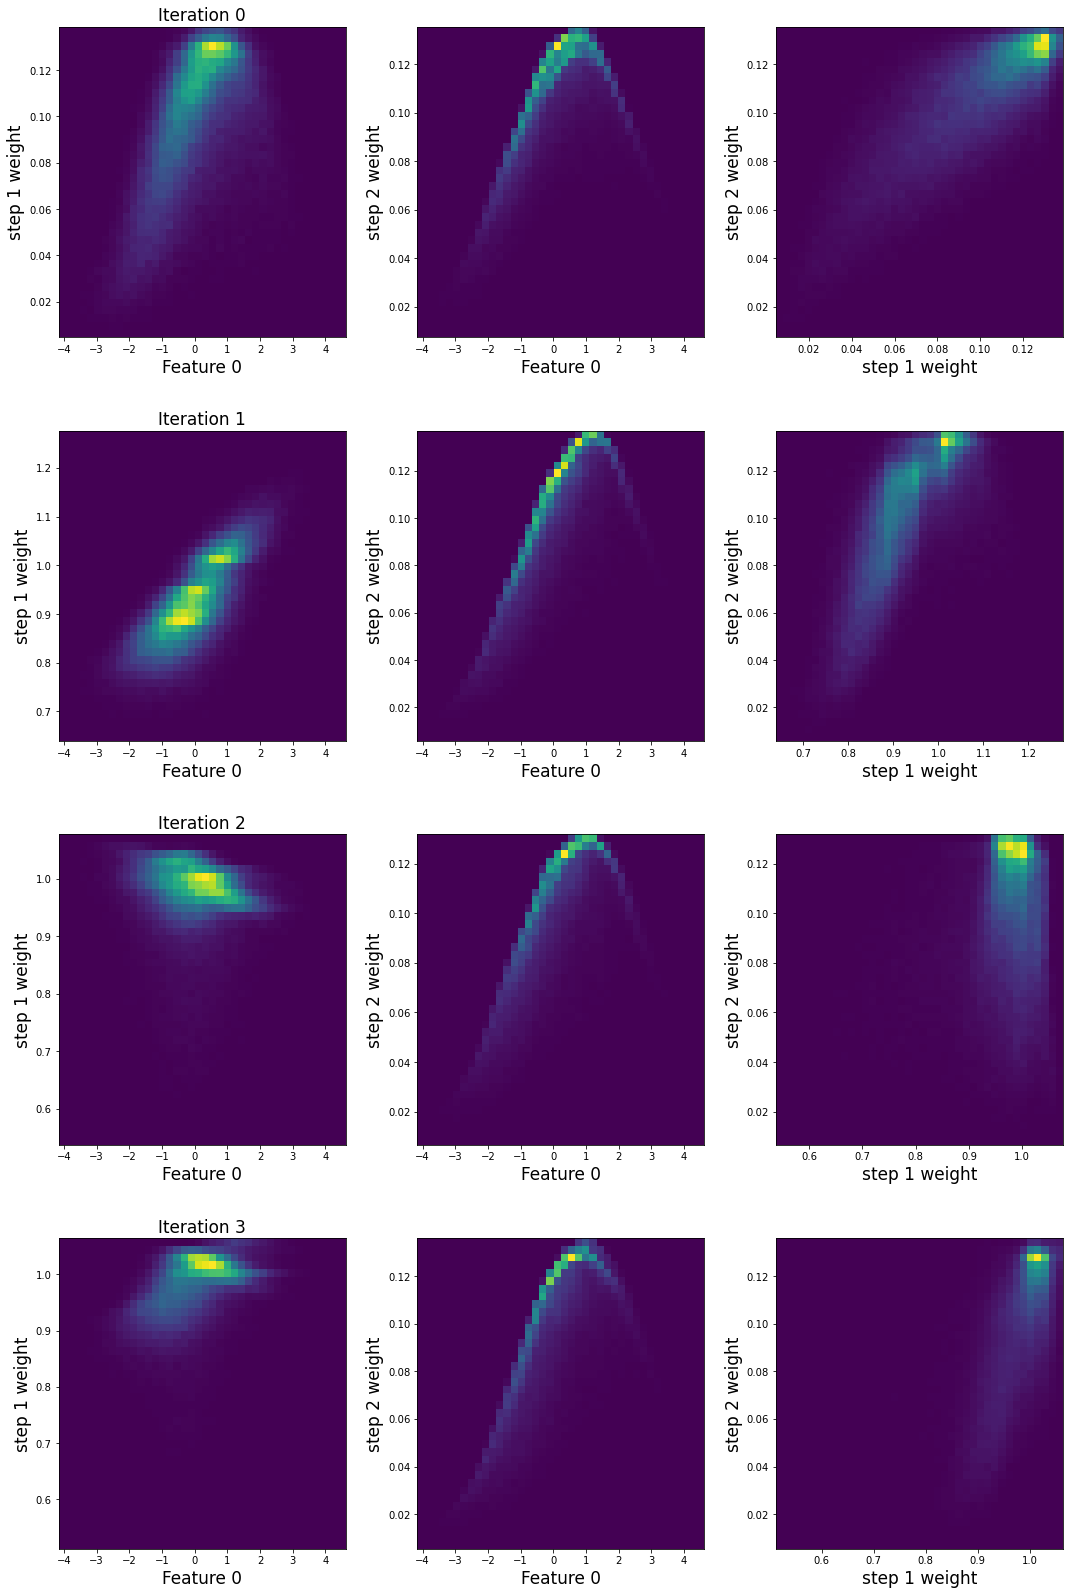

In [21]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,0], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,0], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 0', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

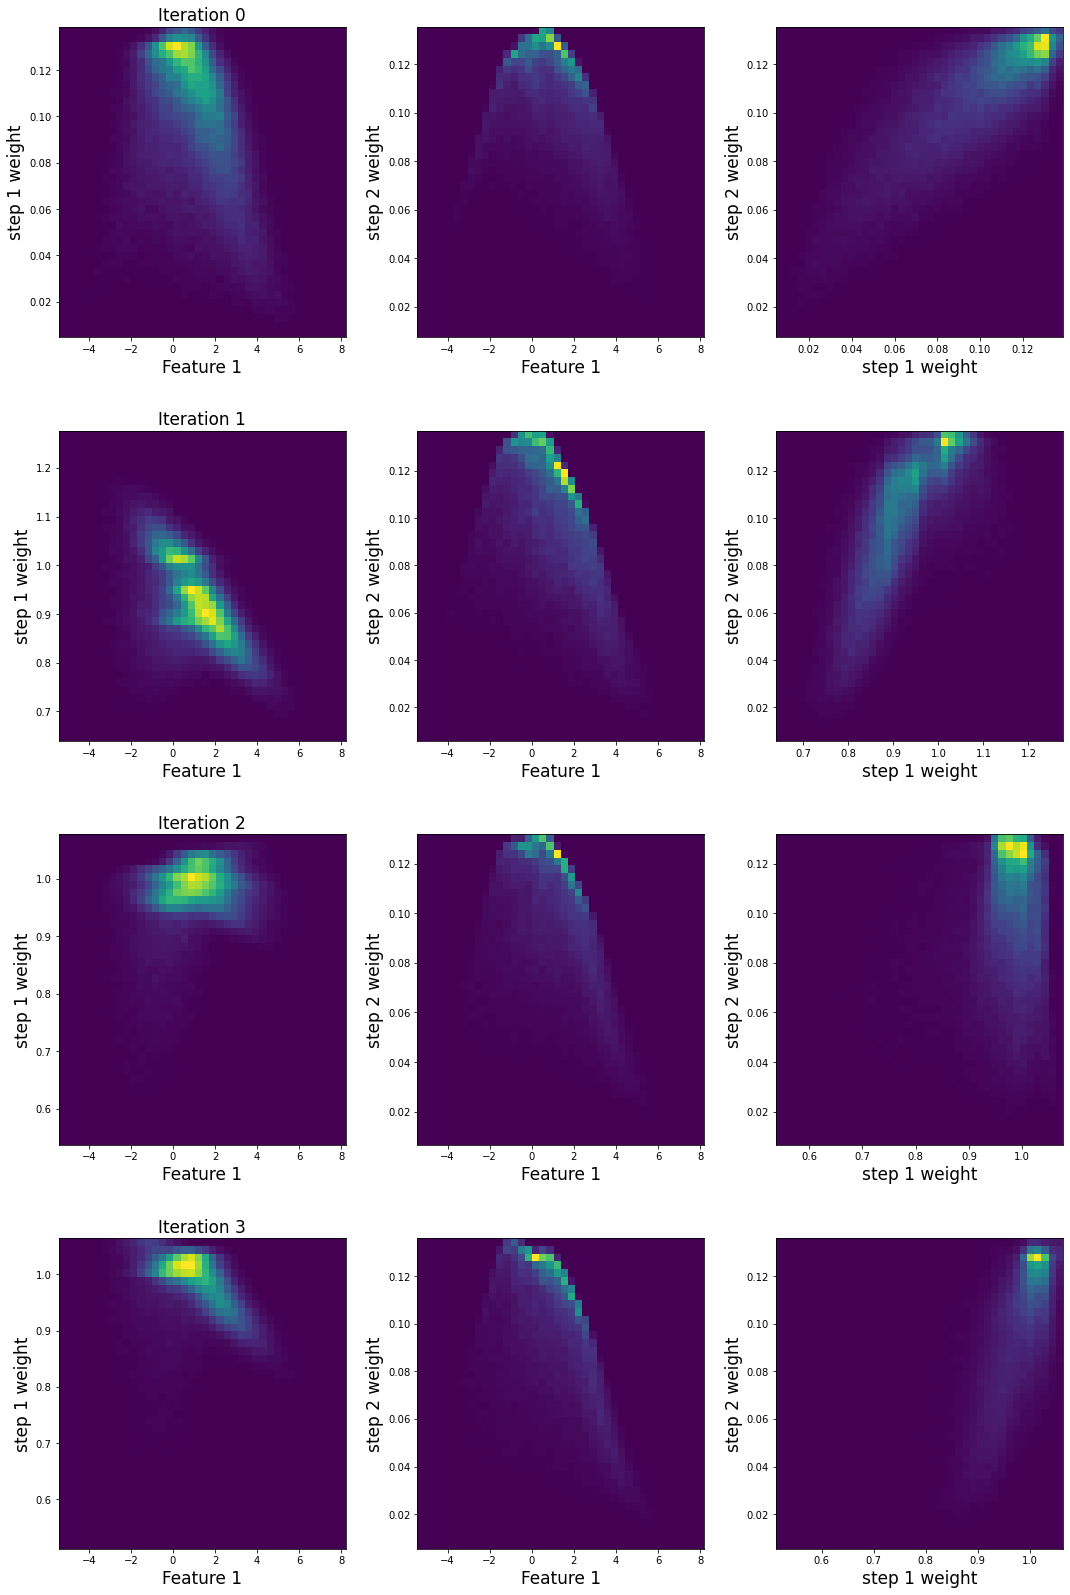

In [22]:
fig,ax = plt.subplots( of_niter, 3, figsize=(18,7*of_niter))

hmin=-6
hmax=6
hbins=40

lfontsize = 17

plt.subplots_adjust( hspace=0.30)
plt.subplots_adjust( wspace=0.25)

for ofi in range(0,of_niter) :

    ax[ofi][0].hist2d( train_pts[:,1], of_weights[ofi,0,:], bins=[hbins,hbins] )
    ax[ofi][1].hist2d( train_pts[:,1], of_weights[ofi,1,:], bins=[hbins,hbins] )
    ax[ofi][2].hist2d( of_weights[ofi,0,:], of_weights[ofi,1,:], bins=[hbins,hbins] )
    
    ax[ofi][0].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][0].set_ylabel( 'step 1 weight', fontsize=lfontsize )
    
    ax[ofi][1].set_xlabel( 'Feature 1', fontsize=lfontsize )
    ax[ofi][1].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
    ax[ofi][2].set_ylabel( 'step 2 weight', fontsize=lfontsize )
    
    ax[ofi][0].set_title('Iteration %d' % ofi, fontsize=lfontsize )
    
    
plt.show

In [23]:
max_step2_weight = np.max( of_weights[3,1,:] )

<function matplotlib.pyplot.show(close=None, block=None)>

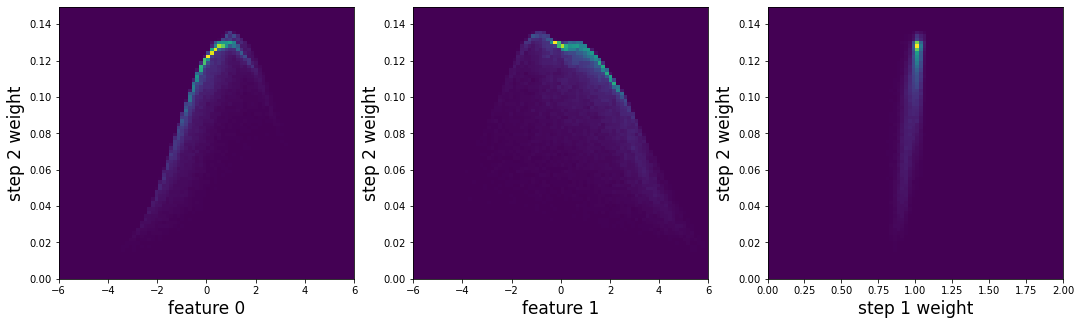

In [24]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))

hmin=-6
hmax=6
hbins=80

ax[0].hist2d( train_pts[:,0], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[1].hist2d( train_pts[:,1], of_weights[3,1,:], bins=[hbins,hbins], range=([hmin,hmax],[0.,1.1*max_step2_weight]))

ax[2].hist2d( of_weights[3,0,:], of_weights[3,1,:], bins=[hbins,hbins], range=([0.,2.],[0.,1.1*max_step2_weight]))


lfontsize = 17

ax[0].set_xlabel( 'feature 0', fontsize=lfontsize )
ax[0].set_ylabel( 'step 2 weight', fontsize=lfontsize )


ax[1].set_xlabel( 'feature 1', fontsize=lfontsize )
ax[1].set_ylabel( 'step 2 weight', fontsize=lfontsize )

ax[2].set_xlabel( 'step 1 weight', fontsize=lfontsize )
ax[2].set_ylabel( 'step 2 weight', fontsize=lfontsize )


plt.show


## Do the bootstrap samples in a loop

In [25]:
n_boot_samples = 1000

do_bootstrap = True

verbose = False

bootstrap_weights = np.zeros( shape=(n_boot_samples, len(train_pts) ))

In [26]:
%%time

rng = np.random.default_rng()

for bi in range(0,n_boot_samples) :
    
    if do_bootstrap :
        print("\n Creating bootstrap sample %3d" % bi )
        #boot_true_det_pts = np.random.Generator.choice( true_det_pts, size=len(true_det_pts) )
        boot_true_det_pts = rng.choice( true_det_pts, size=len(true_det_pts) )
        
    else :
        print("\n Creating toy sample %3d" % bi )
        boot_true_pts = np.random.multivariate_normal(true_mu, true_cov, size=ngen_true)
        boot_true_det_pts = np.random.normal( boot_true_pts, [res0, res1])
        
    boot_of_weights = of.omnifold( train_both, boot_true_det_pts, of_niter, model, verbose)
    
    bootstrap_weights[bi] = boot_of_weights[3,1,:]
    


 Creating bootstrap sample   0
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample   1
10/10 [==============================] - 0s 627us/step

 Creating bootstrap sample   2
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample   3
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample   4
10/10 [==============================] - 0s 675us/step

 Creating bootstrap sample   5
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample   6
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample   7
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample   8
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample   9
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample  10
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample  11
10/10 [====

10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample  12
10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample  13
10/10 [==============================] - 0s 661us/step

 Creating bootstrap sample  14
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample  15
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample  16
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample  17
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample  18
10/10 [==============================] - 0s 672us/step

 Creating bootstrap sample  19
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample  20
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample  21
10/10 [==============================] - 0s 759us/step

 Creating bootstrap sample  22
10/10 [==============================] - 0s

10/10 [==============================] - 0s 759us/step

 Creating bootstrap sample  24
10/10 [==============================] - 0s 786us/step

 Creating bootstrap sample  25
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample  26
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample  27
10/10 [==============================] - 0s 643us/step

 Creating bootstrap sample  28
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  29
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample  30
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample  31
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample  32
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  33
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample  34
10/10 [==============================] - 0s

10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample  36
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample  37
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample  38
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample  39
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample  40
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample  41
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample  42
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample  43
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample  44
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample  45
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample  46
10/10 [==============================] - 0s

10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample  48
10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample  49
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample  50
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample  51
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample  52
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample  53
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample  54
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample  55
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample  56
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample  57
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample  58
10/10 [==============================] - 0s

10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample  60
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  61
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample  62
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample  63
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample  64
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample  65
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample  66
10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample  67
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample  68
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  69
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample  70
10/10 [==============================] - 0s

10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample  72
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample  73
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample  74
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample  75
10/10 [==============================] - 0s 645us/step

 Creating bootstrap sample  76
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample  77
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample  78
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample  79
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample  80
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample  81
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample  82
10/10 [==============================] - 0s

10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample  83
10/10 [==============================] - 0s 786us/step

 Creating bootstrap sample  84
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample  85
10/10 [==============================] - 0s 760us/step

 Creating bootstrap sample  86
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample  87
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample  88
10/10 [==============================] - 0s 665us/step

 Creating bootstrap sample  89
10/10 [==============================] - 0s 764us/step

 Creating bootstrap sample  90
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample  91
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample  92
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample  93
10/10 [==============================] - 0s

10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample  95
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample  96
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample  97
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample  98
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample  99
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 100
10/10 [==============================] - 0s 781us/step

 Creating bootstrap sample 101
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 102
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 103
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 104
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 105
10/10 [==============================] - 0s

10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 107
10/10 [==============================] - 0s 645us/step

 Creating bootstrap sample 108
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 109
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 110
10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample 111
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample 112
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 113
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample 114
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 115
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 116
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 117
10/10 [==============================] - 0s

10/10 [==============================] - 0s 764us/step

 Creating bootstrap sample 119
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 120
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 121
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 122
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 123
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 124
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 125
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 126
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 127
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 128
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 129
10/10 [==============================] - 0s

10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 131
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 132
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 133
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 134
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 135
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 136
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 137
10/10 [==============================] - 0s 822us/step

 Creating bootstrap sample 138
10/10 [==============================] - 0s 669us/step

 Creating bootstrap sample 139
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 140
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 141
10/10 [==============================] - 0s

10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample 143
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 144
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 145
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 146
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 147
10/10 [==============================] - 0s 678us/step

 Creating bootstrap sample 148
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 149
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 150
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 151
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 152
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 153
10/10 [==============================] - 0s

10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 154
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 155
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 156
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 157
10/10 [==============================] - 0s 664us/step

 Creating bootstrap sample 158
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 159
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 160
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 161
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 162
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample 163
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 164
10/10 [==============================] - 0s

10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 166
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 167
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 168
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 169
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 170
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 171
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 172
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 173
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 174
10/10 [==============================] - 0s 759us/step

 Creating bootstrap sample 175
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 176
10/10 [==============================] - 0s

10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 178
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 179
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 180
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 181
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 182
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 183
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 184
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 185
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 186
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 187
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 188
10/10 [==============================] - 0s

10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 190
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 191
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 192
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 193
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 194
10/10 [==============================] - 0s 648us/step

 Creating bootstrap sample 195
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 196
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample 197
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 198
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 199
10/10 [==============================] - 0s 661us/step

 Creating bootstrap sample 200
10/10 [==============================] - 0s

10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 202
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 203
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 204
10/10 [==============================] - 0s 847us/step

 Creating bootstrap sample 205
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 206
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 207
10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample 208
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 209
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 210
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 211
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 212
10/10 [==============================] - 0s

10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 214
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 215
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 216
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 217
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 218
10/10 [==============================] - 0s 780us/step

 Creating bootstrap sample 219
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 220
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 221
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample 222
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 223
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 224
10/10 [==============================] - 0s

10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 225
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 226
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 227
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 228
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample 229
10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample 230
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 231
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample 232
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 233
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 234
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 235
10/10 [==============================] - 0s

10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 237
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 238
10/10 [==============================] - 0s 635us/step

 Creating bootstrap sample 239
10/10 [==============================] - 0s 633us/step

 Creating bootstrap sample 240
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample 241
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 242
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 243
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 244
10/10 [==============================] - 0s 802us/step

 Creating bootstrap sample 245
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 246
10/10 [==============================] - 0s 860us/step

 Creating bootstrap sample 247
10/10 [==============================] - 0s

10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 249
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 250
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 251
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 252
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 253
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 254
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 255
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 256
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 257
10/10 [==============================] - 0s 670us/step

 Creating bootstrap sample 258
10/10 [==============================] - 0s 672us/step

 Creating bootstrap sample 259
10/10 [==============================] - 0s

10/10 [==============================] - 0s 674us/step

 Creating bootstrap sample 261
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 262
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 263
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 264
10/10 [==============================] - 0s 663us/step

 Creating bootstrap sample 265
10/10 [==============================] - 0s 810us/step

 Creating bootstrap sample 266
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 267
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 268
10/10 [==============================] - 0s 674us/step

 Creating bootstrap sample 269
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 270
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 271
10/10 [==============================] - 0s

10/10 [==============================] - 0s 786us/step

 Creating bootstrap sample 273
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 274
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 275
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 276
10/10 [==============================] - 0s 638us/step

 Creating bootstrap sample 277
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample 278
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 279
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 280
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 281
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 282
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample 283
10/10 [==============================] - 0s

10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 285
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 286
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 287
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 288
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 289
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 290
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 291
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 292
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 293
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 294
10/10 [==============================] - 0s 664us/step

 Creating bootstrap sample 295
10/10 [==============================] - 0s

10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 296
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample 297
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 298
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 299
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 300
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 301
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 302
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 303
10/10 [==============================] - 0s 789us/step

 Creating bootstrap sample 304
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 305
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 306
10/10 [==============================] - 0s

10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 308
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 309
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 310
10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample 311
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 312
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 313
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 314
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 315
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 316
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 317
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 318
10/10 [==============================] - 0s

10/10 [==============================] - 0s 662us/step

 Creating bootstrap sample 320
10/10 [==============================] - 0s 765us/step

 Creating bootstrap sample 321
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 322
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 323
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 324
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 325
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 326
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 327
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 328
10/10 [==============================] - 0s 812us/step

 Creating bootstrap sample 329
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 330
10/10 [==============================] - 0s

10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 332
10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample 333
10/10 [==============================] - 0s 660us/step

 Creating bootstrap sample 334
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 335
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 336
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 337
10/10 [==============================] - 0s 784us/step

 Creating bootstrap sample 338
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 339
10/10 [==============================] - 0s 678us/step

 Creating bootstrap sample 340
10/10 [==============================] - 0s 780us/step

 Creating bootstrap sample 341
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 342
10/10 [==============================] - 0s

10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 344
10/10 [==============================] - 0s 671us/step

 Creating bootstrap sample 345
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 346
10/10 [==============================] - 0s 862us/step

 Creating bootstrap sample 347
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 348
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 349
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 350
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 351
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 352
10/10 [==============================] - 0s 675us/step

 Creating bootstrap sample 353
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 354
10/10 [==============================] - 0s

10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 356
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 357
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 358
10/10 [==============================] - 0s 780us/step

 Creating bootstrap sample 359
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 360
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 361
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 362
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 363
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 364
10/10 [==============================] - 0s 779us/step

 Creating bootstrap sample 365
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 366
10/10 [==============================] - 0s

10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 367
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 368
10/10 [==============================] - 0s 664us/step

 Creating bootstrap sample 369
10/10 [==============================] - 0s 659us/step

 Creating bootstrap sample 370
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 371
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 372
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 373
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 374
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 375
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 376
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 377
10/10 [==============================] - 0s

10/10 [==============================] - 0s 797us/step

 Creating bootstrap sample 379
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 380
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 381
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 382
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 383
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 384
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 385
10/10 [==============================] - 0s 764us/step

 Creating bootstrap sample 386
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 387
10/10 [==============================] - 0s 685us/step

 Creating bootstrap sample 388
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 389
10/10 [==============================] - 0s

10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 391
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 392
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 393
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 394
10/10 [==============================] - 0s 787us/step

 Creating bootstrap sample 395
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 396
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 397
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 398
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample 399
10/10 [==============================] - 0s 841us/step

 Creating bootstrap sample 400
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 401
10/10 [==============================] - 0s

10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 403
10/10 [==============================] - 0s 806us/step

 Creating bootstrap sample 404
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 405
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 406
10/10 [==============================] - 0s 674us/step

 Creating bootstrap sample 407
10/10 [==============================] - 0s 780us/step

 Creating bootstrap sample 408
10/10 [==============================] - 0s 672us/step

 Creating bootstrap sample 409
10/10 [==============================] - 0s 778us/step

 Creating bootstrap sample 410
10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample 411
10/10 [==============================] - 0s 662us/step

 Creating bootstrap sample 412
10/10 [==============================] - 0s 661us/step

 Creating bootstrap sample 413
10/10 [==============================] - 0s

10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 415
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 416
10/10 [==============================] - 0s 686us/step

 Creating bootstrap sample 417
10/10 [==============================] - 0s 670us/step

 Creating bootstrap sample 418
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 419
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 420
10/10 [==============================] - 0s 840us/step

 Creating bootstrap sample 421
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 422
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample 423
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 424
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 425
10/10 [==============================] - 0s

10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 427
10/10 [==============================] - 0s 675us/step

 Creating bootstrap sample 428
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 429
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 430
10/10 [==============================] - 0s 672us/step

 Creating bootstrap sample 431
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 432
10/10 [==============================] - 0s 769us/step

 Creating bootstrap sample 433
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 434
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 435
10/10 [==============================] - 0s 659us/step

 Creating bootstrap sample 436
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 437
10/10 [==============================] - 0s

10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 438
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 439
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 440
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 441
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 442
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 443
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 444
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 445
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 446
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 447
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 448
10/10 [==============================] - 0s

10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 450
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 451
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 452
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 453
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 454
10/10 [==============================] - 0s 663us/step

 Creating bootstrap sample 455
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 456
10/10 [==============================] - 0s 769us/step

 Creating bootstrap sample 457
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 458
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 459
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 460
10/10 [==============================] - 0s

10/10 [==============================] - 0s 780us/step

 Creating bootstrap sample 462
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 463
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 464
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 465
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 466
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 467
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 468
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 469
10/10 [==============================] - 0s 766us/step

 Creating bootstrap sample 470
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 471
10/10 [==============================] - 0s 647us/step

 Creating bootstrap sample 472
10/10 [==============================] - 0s

10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 474
10/10 [==============================] - 0s 775us/step

 Creating bootstrap sample 475
10/10 [==============================] - 0s 805us/step

 Creating bootstrap sample 476
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 477
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 478
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 479
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 480
10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample 481
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 482
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 483
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 484
10/10 [==============================] - 0s

10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 486
10/10 [==============================] - 0s 775us/step

 Creating bootstrap sample 487
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 488
10/10 [==============================] - 0s 806us/step

 Creating bootstrap sample 489
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 490
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 491
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 492
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 493
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 494
10/10 [==============================] - 0s 640us/step

 Creating bootstrap sample 495
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 496
10/10 [==============================] - 0s

10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 498
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 499
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample 500
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 501
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 502
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 503
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 504
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 505
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample 506
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 507
10/10 [==============================] - 0s 674us/step

 Creating bootstrap sample 508
10/10 [==============================] - 0s

10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 509
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 510
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 511
10/10 [==============================] - 0s 760us/step

 Creating bootstrap sample 512
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 513
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 514
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 515
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 516
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 517
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 518
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 519
10/10 [==============================] - 0s

10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 521
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 522
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 523
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 524
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 525
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 526
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 527
10/10 [==============================] - 0s 781us/step

 Creating bootstrap sample 528
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 529
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 530
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 531
10/10 [==============================] - 0s

10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 533
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 534
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 535
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 536
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 537
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 538
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 539
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 540
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 541
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 542
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 543
10/10 [==============================] - 0s

10/10 [==============================] - 0s 647us/step

 Creating bootstrap sample 545
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 546
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 547
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 548
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 549
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 550
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 551
10/10 [==============================] - 0s 795us/step

 Creating bootstrap sample 552
10/10 [==============================] - 0s 657us/step

 Creating bootstrap sample 553
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 554
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 555
10/10 [==============================] - 0s

10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 557
10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 558
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 559
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 560
10/10 [==============================] - 0s 772us/step

 Creating bootstrap sample 561
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 562
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample 563
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 564
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 565
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 566
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 567
10/10 [==============================] - 0s

10/10 [==============================] - 0s 806us/step

 Creating bootstrap sample 569
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 570
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 571
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 572
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 573
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 574
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample 575
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 576
10/10 [==============================] - 0s 770us/step

 Creating bootstrap sample 577
10/10 [==============================] - 0s 832us/step

 Creating bootstrap sample 578
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 579
10/10 [==============================] - 0s

10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 580
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 581
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 582
10/10 [==============================] - 0s 827us/step

 Creating bootstrap sample 583
10/10 [==============================] - 0s 669us/step

 Creating bootstrap sample 584
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 585
10/10 [==============================] - 0s 809us/step

 Creating bootstrap sample 586
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 587
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 588
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 589
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 590
10/10 [==============================] - 0s

10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 592
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 593
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 594
10/10 [==============================] - 0s 762us/step

 Creating bootstrap sample 595
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 596
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 597
10/10 [==============================] - 0s 779us/step

 Creating bootstrap sample 598
10/10 [==============================] - 0s 813us/step

 Creating bootstrap sample 599
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample 600
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample 601
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 602
10/10 [==============================] - 0s

10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample 604
10/10 [==============================] - 0s 802us/step

 Creating bootstrap sample 605
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 606
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 607
10/10 [==============================] - 0s 636us/step

 Creating bootstrap sample 608
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 609
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 610
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 611
10/10 [==============================] - 0s 671us/step

 Creating bootstrap sample 612
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 613
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 614
10/10 [==============================] - 0s

10/10 [==============================] - 0s 656us/step

 Creating bootstrap sample 616
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 617
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 618
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 619
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 620
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 621
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 622
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 623
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 624
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 625
10/10 [==============================] - 0s 680us/step

 Creating bootstrap sample 626
10/10 [==============================] - 0s

10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 628
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 629
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 630
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 631
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 632
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample 633
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 634
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 635
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 636
10/10 [==============================] - 0s 642us/step

 Creating bootstrap sample 637
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 638
10/10 [==============================] - 0s

10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 640
10/10 [==============================] - 0s 689us/step

 Creating bootstrap sample 641
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 642
10/10 [==============================] - 0s 657us/step

 Creating bootstrap sample 643
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 644
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 645
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 646
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 647
10/10 [==============================] - 0s 778us/step

 Creating bootstrap sample 648
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 649
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 650
10/10 [==============================] - 0s

10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 651
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 652
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 653
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 654
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 655
10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample 656
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 657
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 658
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 659
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 660
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 661
10/10 [==============================] - 0s

10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 663
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 664
10/10 [==============================] - 0s 701us/step

 Creating bootstrap sample 665
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 666
10/10 [==============================] - 0s 669us/step

 Creating bootstrap sample 667
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 668
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 669
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 670
10/10 [==============================] - 0s 735us/step

 Creating bootstrap sample 671
10/10 [==============================] - 0s 750us/step

 Creating bootstrap sample 672
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 673
10/10 [==============================] - 0s

10/10 [==============================] - 0s 772us/step

 Creating bootstrap sample 675
10/10 [==============================] - 0s 653us/step

 Creating bootstrap sample 676
10/10 [==============================] - 0s 676us/step

 Creating bootstrap sample 677
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 678
10/10 [==============================] - 0s 810us/step

 Creating bootstrap sample 679
10/10 [==============================] - 0s 785us/step

 Creating bootstrap sample 680
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 681
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 682
10/10 [==============================] - 0s 777us/step

 Creating bootstrap sample 683
10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample 684
10/10 [==============================] - 0s 769us/step

 Creating bootstrap sample 685
10/10 [==============================] - 0s

10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 687
10/10 [==============================] - 0s 782us/step

 Creating bootstrap sample 688
10/10 [==============================] - 0s 819us/step

 Creating bootstrap sample 689
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 690
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 691
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 692
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 693
10/10 [==============================] - 0s 699us/step

 Creating bootstrap sample 694
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 695
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 696
10/10 [==============================] - 0s 771us/step

 Creating bootstrap sample 697
10/10 [==============================] - 0s

10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 699
10/10 [==============================] - 0s 644us/step

 Creating bootstrap sample 700
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 701
10/10 [==============================] - 0s 671us/step

 Creating bootstrap sample 702
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 703
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 704
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 705
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 706
10/10 [==============================] - 0s 697us/step

 Creating bootstrap sample 707
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 708
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 709
10/10 [==============================] - 0s

10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 711
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 712
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 713
10/10 [==============================] - 0s 654us/step

 Creating bootstrap sample 714
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 715
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 716
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 717
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 718
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 719
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 720
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 721
10/10 [==============================] - 0s

10/10 [==============================] - 0s 772us/step

 Creating bootstrap sample 722
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 723
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 724
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 725
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 726
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample 727
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 728
10/10 [==============================] - 0s 722us/step

 Creating bootstrap sample 729
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 730
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 731
10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample 732
10/10 [==============================] - 0s

10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 734
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample 735
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 736
10/10 [==============================] - 0s 796us/step

 Creating bootstrap sample 737
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 738
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 739
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 740
10/10 [==============================] - 0s 777us/step

 Creating bootstrap sample 741
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 742
10/10 [==============================] - 0s 690us/step

 Creating bootstrap sample 743
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 744
10/10 [==============================] - 0s

10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 746
10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample 747
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 748
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 749
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 750
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 751
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 752
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 753
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 754
10/10 [==============================] - 0s 645us/step

 Creating bootstrap sample 755
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 756
10/10 [==============================] - 0s

10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 758
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 759
10/10 [==============================] - 0s 657us/step

 Creating bootstrap sample 760
10/10 [==============================] - 0s 681us/step

 Creating bootstrap sample 761
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 762
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 763
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 764
10/10 [==============================] - 0s 694us/step

 Creating bootstrap sample 765
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 766
10/10 [==============================] - 0s 687us/step

 Creating bootstrap sample 767
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample 768
10/10 [==============================] - 0s

10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 770
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 771
10/10 [==============================] - 0s 592us/step

 Creating bootstrap sample 772
10/10 [==============================] - 0s 670us/step

 Creating bootstrap sample 773
10/10 [==============================] - 0s 752us/step

 Creating bootstrap sample 774
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 775
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 776
10/10 [==============================] - 0s 760us/step

 Creating bootstrap sample 777
10/10 [==============================] - 0s 613us/step

 Creating bootstrap sample 778
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 779
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 780
10/10 [==============================] - 0s

10/10 [==============================] - 0s 813us/step

 Creating bootstrap sample 782
10/10 [==============================] - 0s 702us/step

 Creating bootstrap sample 783
10/10 [==============================] - 0s 666us/step

 Creating bootstrap sample 784
10/10 [==============================] - 0s 667us/step

 Creating bootstrap sample 785
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 786
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 787
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 788
10/10 [==============================] - 0s 710us/step

 Creating bootstrap sample 789
10/10 [==============================] - 0s 794us/step

 Creating bootstrap sample 790
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 791
10/10 [==============================] - 0s 673us/step

 Creating bootstrap sample 792
10/10 [==============================] - 0s

10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 793
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 794
10/10 [==============================] - 0s 693us/step

 Creating bootstrap sample 795
10/10 [==============================] - 0s 786us/step

 Creating bootstrap sample 796
10/10 [==============================] - 0s 715us/step

 Creating bootstrap sample 797
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 798
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 799
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 800
10/10 [==============================] - 0s 732us/step

 Creating bootstrap sample 801
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 802
10/10 [==============================] - 0s 760us/step

 Creating bootstrap sample 803
10/10 [==============================] - 0s

10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 805
10/10 [==============================] - 0s 772us/step

 Creating bootstrap sample 806
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 807
10/10 [==============================] - 0s 671us/step

 Creating bootstrap sample 808
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 809
10/10 [==============================] - 0s 816us/step

 Creating bootstrap sample 810
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample 811
10/10 [==============================] - 0s 807us/step

 Creating bootstrap sample 812
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 813
10/10 [==============================] - 0s 741us/step

 Creating bootstrap sample 814
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 815
10/10 [==============================] - 0s

10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 817
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 818
10/10 [==============================] - 0s 754us/step

 Creating bootstrap sample 819
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 820
10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 821
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 822
10/10 [==============================] - 0s 717us/step

 Creating bootstrap sample 823
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 824
10/10 [==============================] - 0s 783us/step

 Creating bootstrap sample 825
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 826
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 827
10/10 [==============================] - 0s

10/10 [==============================] - 0s 773us/step

 Creating bootstrap sample 829
10/10 [==============================] - 0s 772us/step

 Creating bootstrap sample 830
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 831
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 832
10/10 [==============================] - 0s 733us/step

 Creating bootstrap sample 833
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 834
10/10 [==============================] - 0s 676us/step

 Creating bootstrap sample 835
10/10 [==============================] - 0s 657us/step

 Creating bootstrap sample 836
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 837
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 838
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 839
10/10 [==============================] - 0s

10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 841
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 842
10/10 [==============================] - 0s 760us/step

 Creating bootstrap sample 843
10/10 [==============================] - 0s 713us/step

 Creating bootstrap sample 844
10/10 [==============================] - 0s 684us/step

 Creating bootstrap sample 845
10/10 [==============================] - 0s 779us/step

 Creating bootstrap sample 846
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 847
10/10 [==============================] - 0s 824us/step

 Creating bootstrap sample 848
10/10 [==============================] - 0s 740us/step

 Creating bootstrap sample 849
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 850
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 851
10/10 [==============================] - 0s

10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 853
10/10 [==============================] - 0s 678us/step

 Creating bootstrap sample 854
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 855
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 856
10/10 [==============================] - 0s 738us/step

 Creating bootstrap sample 857
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 858
10/10 [==============================] - 0s 765us/step

 Creating bootstrap sample 859
10/10 [==============================] - 0s 723us/step

 Creating bootstrap sample 860
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 861
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 862
10/10 [==============================] - 0s 797us/step

 Creating bootstrap sample 863
10/10 [==============================] - 0s

10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 864
10/10 [==============================] - 0s 718us/step

 Creating bootstrap sample 865
10/10 [==============================] - 0s 705us/step

 Creating bootstrap sample 866
10/10 [==============================] - 0s 620us/step

 Creating bootstrap sample 867
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 868
10/10 [==============================] - 0s 675us/step

 Creating bootstrap sample 869
10/10 [==============================] - 0s 743us/step

 Creating bootstrap sample 870
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 871
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 872
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 873
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 874
10/10 [==============================] - 0s

10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 876
10/10 [==============================] - 0s 719us/step

 Creating bootstrap sample 877
10/10 [==============================] - 0s 726us/step

 Creating bootstrap sample 878
10/10 [==============================] - 0s 679us/step

 Creating bootstrap sample 879
10/10 [==============================] - 0s 706us/step

 Creating bootstrap sample 880
10/10 [==============================] - 0s 756us/step

 Creating bootstrap sample 881
10/10 [==============================] - 0s 674us/step

 Creating bootstrap sample 882
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 883
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 884
10/10 [==============================] - 0s 768us/step

 Creating bootstrap sample 885
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 886
10/10 [==============================] - 0s

10/10 [==============================] - 0s 728us/step

 Creating bootstrap sample 888
10/10 [==============================] - 0s 803us/step

 Creating bootstrap sample 889
10/10 [==============================] - 0s 765us/step

 Creating bootstrap sample 890
10/10 [==============================] - 0s 731us/step

 Creating bootstrap sample 891
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample 892
10/10 [==============================] - 0s 765us/step

 Creating bootstrap sample 893
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 894
10/10 [==============================] - 0s 765us/step

 Creating bootstrap sample 895
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 896
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 897
10/10 [==============================] - 0s 813us/step

 Creating bootstrap sample 898
10/10 [==============================] - 0s

10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 900
10/10 [==============================] - 0s 751us/step

 Creating bootstrap sample 901
10/10 [==============================] - 0s 724us/step

 Creating bootstrap sample 902
10/10 [==============================] - 0s 672us/step

 Creating bootstrap sample 903
10/10 [==============================] - 0s 712us/step

 Creating bootstrap sample 904
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 905
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 906
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 907
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 908
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 909
10/10 [==============================] - 0s 843us/step

 Creating bootstrap sample 910
10/10 [==============================] - 0s

10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 912
10/10 [==============================] - 0s 730us/step

 Creating bootstrap sample 913
10/10 [==============================] - 0s 624us/step

 Creating bootstrap sample 914
10/10 [==============================] - 0s 642us/step

 Creating bootstrap sample 915
10/10 [==============================] - 0s 737us/step

 Creating bootstrap sample 916
10/10 [==============================] - 0s 764us/step

 Creating bootstrap sample 917
10/10 [==============================] - 0s 745us/step

 Creating bootstrap sample 918
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 919
10/10 [==============================] - 0s 688us/step

 Creating bootstrap sample 920
10/10 [==============================] - 0s 770us/step

 Creating bootstrap sample 921
10/10 [==============================] - 0s 691us/step

 Creating bootstrap sample 922
10/10 [==============================] - 0s

10/10 [==============================] - 0s 703us/step

 Creating bootstrap sample 924
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 925
10/10 [==============================] - 0s 770us/step

 Creating bootstrap sample 926
10/10 [==============================] - 0s 676us/step

 Creating bootstrap sample 927
10/10 [==============================] - 0s 781us/step

 Creating bootstrap sample 928
10/10 [==============================] - 0s 709us/step

 Creating bootstrap sample 929
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 930
10/10 [==============================] - 0s 638us/step

 Creating bootstrap sample 931
10/10 [==============================] - 0s 668us/step

 Creating bootstrap sample 932
10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 933
10/10 [==============================] - 0s 696us/step

 Creating bootstrap sample 934
10/10 [==============================] - 0s

10/10 [==============================] - 0s 655us/step

 Creating bootstrap sample 935
10/10 [==============================] - 0s 683us/step

 Creating bootstrap sample 936
10/10 [==============================] - 0s 742us/step

 Creating bootstrap sample 937
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 938
10/10 [==============================] - 0s 692us/step

 Creating bootstrap sample 939
10/10 [==============================] - 0s 647us/step

 Creating bootstrap sample 940
10/10 [==============================] - 0s 739us/step

 Creating bootstrap sample 941
10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 942
10/10 [==============================] - 0s 748us/step

 Creating bootstrap sample 943
10/10 [==============================] - 0s 744us/step

 Creating bootstrap sample 944
10/10 [==============================] - 0s 641us/step

 Creating bootstrap sample 945
10/10 [==============================] - 0s

10/10 [==============================] - 0s 707us/step

 Creating bootstrap sample 947
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 948
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 949
10/10 [==============================] - 0s 818us/step

 Creating bootstrap sample 950
10/10 [==============================] - 0s 658us/step

 Creating bootstrap sample 951
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 952
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample 953
10/10 [==============================] - 0s 695us/step

 Creating bootstrap sample 954
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 955
10/10 [==============================] - 0s 776us/step

 Creating bootstrap sample 956
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 957
10/10 [==============================] - 0s

10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 959
10/10 [==============================] - 0s 746us/step

 Creating bootstrap sample 960
10/10 [==============================] - 0s 682us/step

 Creating bootstrap sample 961
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 962
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 963
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 964
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 965
10/10 [==============================] - 0s 727us/step

 Creating bootstrap sample 966
10/10 [==============================] - 0s 840us/step

 Creating bootstrap sample 967
10/10 [==============================] - 0s 698us/step

 Creating bootstrap sample 968
10/10 [==============================] - 0s 753us/step

 Creating bootstrap sample 969
10/10 [==============================] - 0s

10/10 [==============================] - 0s 863us/step

 Creating bootstrap sample 971
10/10 [==============================] - 0s 767us/step

 Creating bootstrap sample 972
10/10 [==============================] - 0s 725us/step

 Creating bootstrap sample 973
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 974
10/10 [==============================] - 0s 721us/step

 Creating bootstrap sample 975
10/10 [==============================] - 0s 819us/step

 Creating bootstrap sample 976
10/10 [==============================] - 0s 700us/step

 Creating bootstrap sample 977
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 978
10/10 [==============================] - 0s 747us/step

 Creating bootstrap sample 979
10/10 [==============================] - 0s 729us/step

 Creating bootstrap sample 980
10/10 [==============================] - 0s 755us/step

 Creating bootstrap sample 981
10/10 [==============================] - 0s

10/10 [==============================] - 0s 749us/step

 Creating bootstrap sample 983
10/10 [==============================] - 0s 758us/step

 Creating bootstrap sample 984
10/10 [==============================] - 0s 720us/step

 Creating bootstrap sample 985
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 986
10/10 [==============================] - 0s 761us/step

 Creating bootstrap sample 987
10/10 [==============================] - 0s 708us/step

 Creating bootstrap sample 988
10/10 [==============================] - 0s 677us/step

 Creating bootstrap sample 989
10/10 [==============================] - 0s 757us/step

 Creating bootstrap sample 990
10/10 [==============================] - 0s 714us/step

 Creating bootstrap sample 991
10/10 [==============================] - 0s 711us/step

 Creating bootstrap sample 992
10/10 [==============================] - 0s 716us/step

 Creating bootstrap sample 993
10/10 [==============================] - 0s

10/10 [==============================] - 0s 641us/step

 Creating bootstrap sample 995
10/10 [==============================] - 0s 782us/step

 Creating bootstrap sample 996
10/10 [==============================] - 0s 734us/step

 Creating bootstrap sample 997
10/10 [==============================] - 0s 704us/step

 Creating bootstrap sample 998
10/10 [==============================] - 0s 736us/step

 Creating bootstrap sample 999
10/10 [==============================] - 0s 698us/step
CPU times: user 9h 16min 40s, sys: 50min 22s, total: 10h 7min 3s
Wall time: 7h 27min 44s


In [27]:
bootstrap_weights

array([[0.10034035, 0.0665322 , 0.12791955, ..., 0.11689717, 0.12192949,
        0.12467698],
       [0.10362341, 0.07195046, 0.13144955, ..., 0.12275264, 0.12538989,
        0.12338255],
       [0.10003352, 0.07542937, 0.12423511, ..., 0.11511638, 0.13558331,
        0.13346072],
       ...,
       [0.09044952, 0.05946707, 0.12638587, ..., 0.12278258, 0.12824242,
        0.12022844],
       [0.09369146, 0.06604017, 0.12747791, ..., 0.11977116, 0.13767645,
        0.13055107],
       [0.10153239, 0.07008504, 0.13010301, ..., 0.12581187, 0.13489942,
        0.13138464]])

In [28]:
of_weights[3,1,:]

array([0.10034399, 0.07074416, 0.12473394, ..., 0.11414599, 0.13142234,
       0.1340342 ])

In [29]:
bootstrap_weights[0]

array([0.10034035, 0.0665322 , 0.12791955, ..., 0.11689717, 0.12192949,
       0.12467698])

In [30]:
np.cov( bootstrap_weights[:,0])

array(3.22849047e-05)

In [31]:
bootstrap_weights[:,100]

array([0.08483735, 0.08759871, 0.08109774, 0.07948376, 0.0792479 ,
       0.0855919 , 0.08387353, 0.084691  , 0.07624518, 0.08205018,
       0.07868257, 0.08211298, 0.08764511, 0.08316057, 0.08925859,
       0.08362021, 0.078456  , 0.08858435, 0.08018316, 0.08303308,
       0.07389306, 0.0789267 , 0.07414071, 0.07654597, 0.07950471,
       0.07802129, 0.08810349, 0.08078053, 0.083363  , 0.0770656 ,
       0.07361344, 0.07583828, 0.07660843, 0.0722961 , 0.07382132,
       0.079577  , 0.09659882, 0.08637112, 0.08977795, 0.0857836 ,
       0.09067292, 0.08599777, 0.07863507, 0.08100889, 0.07757789,
       0.09449011, 0.08457217, 0.08619031, 0.08398852, 0.0878136 ,
       0.08382181, 0.08959229, 0.08368745, 0.07976679, 0.09038068,
       0.08671375, 0.0808616 , 0.09015092, 0.09407318, 0.07858034,
       0.0793286 , 0.07706623, 0.08754929, 0.07707604, 0.0825988 ,
       0.08380885, 0.09095956, 0.0773465 , 0.09108312, 0.08149388,
       0.08778202, 0.0843474 , 0.07791584, 0.08888353, 0.08307

<function matplotlib.pyplot.show(close=None, block=None)>

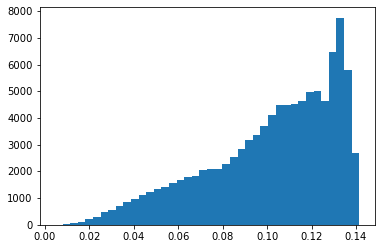

In [32]:
plt.hist( bootstrap_weights[1,:], bins=40)
plt.show

In [33]:
np.mean( bootstrap_weights, axis=0 )

array([0.10204438, 0.0738036 , 0.12614649, ..., 0.11755716, 0.12308999,
       0.12292069])

In [34]:
bootstrap_w2 = bootstrap_weights * bootstrap_weights

In [35]:
bootstrap_w2

array([[0.01006819, 0.00442653, 0.01636341, ..., 0.01366495, 0.0148668 ,
        0.01554435],
       [0.01073781, 0.00517687, 0.01727898, ..., 0.01506821, 0.01572262,
        0.01522325],
       [0.01000671, 0.00568959, 0.01543436, ..., 0.01325178, 0.01838283,
        0.01781176],
       ...,
       [0.00818112, 0.00353633, 0.01597339, ..., 0.01507556, 0.01644612,
        0.01445488],
       [0.00877809, 0.0043613 , 0.01625062, ..., 0.01434513, 0.0189548 ,
        0.01704358],
       [0.01030883, 0.00491191, 0.01692679, ..., 0.01582863, 0.01819785,
        0.01726192]])

In [36]:
bootstrap_variance = np.mean( bootstrap_w2, axis=0 ) - np.mean( bootstrap_weights, axis=0 ) * np.mean( bootstrap_weights, axis=0 )

In [37]:
bootstrap_variance

array([3.22526198e-05, 3.51025438e-05, 3.59293051e-05, ...,
       4.89323900e-05, 8.10708791e-05, 6.52213562e-05])

In [38]:
bootstrap_rms = np.sqrt( bootstrap_variance )

In [39]:
bootstrap_rms

array([0.00567914, 0.00592474, 0.00599411, ..., 0.00699517, 0.00900394,
       0.00807597])

In [40]:
col_vec = np.array([[11],[22],[33]])

In [41]:
col_vec

array([[11],
       [22],
       [33]])

In [42]:
row_vec = col_vec.T

In [43]:
row_vec

array([[11, 22, 33]])

In [44]:
col_times_row = col_vec * row_vec

In [45]:
col_times_row

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [46]:
col_vec.shape

(3, 1)

In [47]:
row_vec.shape

(1, 3)

In [48]:
col_times_row.shape

(3, 3)

In [49]:
row_times_col = row_vec * col_vec

In [50]:
row_times_col

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [51]:
row_times_row = row_vec * row_vec

In [52]:
row_times_row

array([[ 121,  484, 1089]])

In [53]:
#row_dot_row = np.dot(row_vec,row_vec)

In [54]:
row_dot_col = np.dot(row_vec,col_vec)

In [55]:
row_dot_col

array([[1694]])

In [56]:
row_dot_col.shape

(1, 1)

In [57]:
col_dot_row = np.dot(col_vec,row_vec)

In [58]:
col_dot_row

array([[ 121,  242,  363],
       [ 242,  484,  726],
       [ 363,  726, 1089]])

In [59]:
bootstrap_weights.shape

(1000, 100000)

In [60]:
bootstrap_weights.T

array([[0.10034035, 0.10362341, 0.10003352, ..., 0.09044952, 0.09369146,
        0.10153239],
       [0.0665322 , 0.07195046, 0.07542937, ..., 0.05946707, 0.06604017,
        0.07008504],
       [0.12791955, 0.13144955, 0.12423511, ..., 0.12638587, 0.12747791,
        0.13010301],
       ...,
       [0.11689717, 0.12275264, 0.11511638, ..., 0.12278258, 0.11977116,
        0.12581187],
       [0.12192949, 0.12538989, 0.13558331, ..., 0.12824242, 0.13767645,
        0.13489942],
       [0.12467698, 0.12338255, 0.13346072, ..., 0.12022844, 0.13055107,
        0.13138464]])

In [61]:
bootstrap_weights.T.shape

(100000, 1000)

In [62]:
bootstrap_weights_dot = np.dot( bootstrap_weights, bootstrap_weights.T )

In [63]:
bootstrap_weights_dot

array([[1086.82409411, 1101.99804284, 1069.77482823, ..., 1061.27256349,
        1081.79755202, 1107.15188298],
       [1101.99804284, 1119.70750074, 1085.30218054, ..., 1077.77587294,
        1099.14716986, 1124.3554626 ],
       [1069.77482823, 1085.30218054, 1057.51731517, ..., 1045.86706981,
        1067.83492479, 1092.49528265],
       ...,
       [1061.27256349, 1077.77587294, 1045.86706981, ..., 1047.22789136,
        1068.45668433, 1089.28832661],
       [1081.79755202, 1099.14716986, 1067.83492479, ..., 1068.45668433,
        1093.67754992, 1113.42051111],
       [1107.15188298, 1124.3554626 , 1092.49528265, ..., 1089.28832661,
        1113.42051111, 1136.65145141]])

In [64]:
bootstrap_weights_dot.shape

(1000, 1000)

In [65]:
#bootstrap_weights_dot2 = np.dot( bootstrap_weights.T, bootstrap_weights )

In [66]:
#bootstrap_weights_dot2

In [67]:
bootstrap_weights[:,0]

array([0.10034035, 0.10362341, 0.10003352, 0.09483358, 0.09708544,
       0.09988999, 0.09783483, 0.10284319, 0.09821899, 0.09810296,
       0.09918229, 0.1053699 , 0.09955589, 0.09644832, 0.1025157 ,
       0.1031226 , 0.10470936, 0.10651781, 0.09703966, 0.1014537 ,
       0.09962477, 0.10401922, 0.09672281, 0.09920478, 0.09597953,
       0.10081973, 0.10338999, 0.10498548, 0.10404663, 0.10302428,
       0.09961581, 0.09817353, 0.09660092, 0.09382936, 0.08848702,
       0.10046523, 0.11152531, 0.10141794, 0.10807742, 0.10698187,
       0.11043274, 0.10295926, 0.10188305, 0.10468108, 0.09160218,
       0.10718968, 0.10316002, 0.11721437, 0.0980244 , 0.10612927,
       0.10240424, 0.11186905, 0.10328839, 0.10428607, 0.10862762,
       0.11271451, 0.10123624, 0.1053986 , 0.10061415, 0.0958042 ,
       0.09713402, 0.08989171, 0.10189566, 0.09746884, 0.09941144,
       0.10403622, 0.10455482, 0.10571244, 0.10327958, 0.10004003,
       0.10229307, 0.1039459 , 0.10352964, 0.0992898 , 0.10596

In [68]:
bootstrap_weights[:,1]

array([0.0665322 , 0.07195046, 0.07542937, 0.07176912, 0.07448454,
       0.08196209, 0.07389189, 0.07981636, 0.07902922, 0.07500429,
       0.07520892, 0.0806504 , 0.08099623, 0.0761722 , 0.07254687,
       0.08199693, 0.07733221, 0.07479743, 0.07165006, 0.06741054,
       0.07309932, 0.07846802, 0.07583333, 0.07255176, 0.07314744,
       0.08018237, 0.07272794, 0.07694045, 0.08202626, 0.07461555,
       0.07649372, 0.07611123, 0.07951076, 0.07246053, 0.07417191,
       0.0797452 , 0.07537474, 0.07132749, 0.07634921, 0.08108405,
       0.07356588, 0.07543088, 0.07393744, 0.08067425, 0.06740749,
       0.07641323, 0.08303933, 0.06948094, 0.07655947, 0.07324274,
       0.07594515, 0.07622737, 0.07413138, 0.07277374, 0.07425233,
       0.08120632, 0.07810594, 0.06855089, 0.06790211, 0.08244172,
       0.07838506, 0.07572342, 0.08012068, 0.0858502 , 0.07610684,
       0.06844317, 0.09230535, 0.08394807, 0.0779239 , 0.07847337,
       0.0815018 , 0.07999906, 0.08022164, 0.07101705, 0.07529

In [69]:
combined = np.column_stack( (bootstrap_weights[:,0], bootstrap_weights[:,1]))

In [70]:
combined

array([[0.10034035, 0.0665322 ],
       [0.10362341, 0.07195046],
       [0.10003352, 0.07542937],
       ...,
       [0.09044952, 0.05946707],
       [0.09369146, 0.06604017],
       [0.10153239, 0.07008504]])

In [71]:
pair_cov = np.cov( combined )

In [72]:
pair_cov

array([[0.0005715 , 0.0005354 , 0.00041591, ..., 0.00052373, 0.00046742,
        0.00053159],
       [0.0005354 , 0.00050159, 0.00038964, ..., 0.00049065, 0.0004379 ,
        0.00049802],
       [0.00041591, 0.00038964, 0.00030268, ..., 0.00038115, 0.00034017,
        0.00038687],
       ...,
       [0.00052373, 0.00049065, 0.00038115, ..., 0.00047996, 0.00042835,
        0.00048716],
       [0.00046742, 0.0004379 , 0.00034017, ..., 0.00042835, 0.0003823 ,
        0.00043478],
       [0.00053159, 0.00049802, 0.00038687, ..., 0.00048716, 0.00043478,
        0.00049447]])

In [73]:
combined_row = np.row_stack( (bootstrap_weights[:,0], bootstrap_weights[:,2]))

In [74]:
combined_row

array([[0.10034035, 0.10362341, 0.10003352, ..., 0.09044952, 0.09369146,
        0.10153239],
       [0.12791955, 0.13144955, 0.12423511, ..., 0.12638587, 0.12747791,
        0.13010301]])

In [75]:
pair_cov_rs = np.cov( combined_row )

In [76]:
pair_cov_rs

array([[ 3.22849047e-05, -3.22471675e-07],
       [-3.22471675e-07,  3.59652703e-05]])

In [77]:
pair_cor = np.corrcoef(combined_row)

In [78]:
pair_cor

array([[ 1.        , -0.00946346],
       [-0.00946346,  1.        ]])

In [79]:
pair_cor[0,1]

-0.009463464422752008

In [80]:
ncalc = 100000
corr_array = np.zeros( ncalc )

point_index = 53

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


In [81]:
corr_array

array([-0.02225097,  0.66454138,  0.1122973 , ...,  0.14134179,
        0.01490518, -0.04198572])

<function matplotlib.pyplot.show(close=None, block=None)>

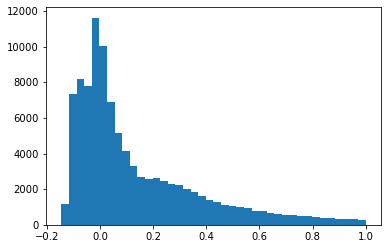

In [82]:
plt.hist( corr_array, bins=40)
plt.show

In [83]:
train_pts[point_index]

array([-0.99846408,  3.21731843])

In [84]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

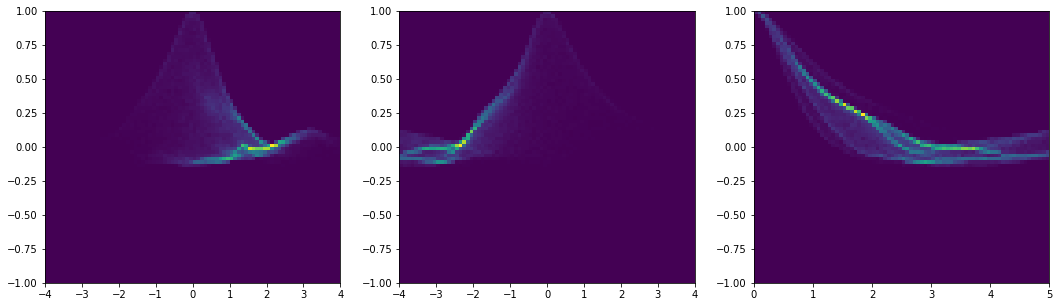

In [85]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1, corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr, corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [86]:
output_filebase = 'bootstrap-output-test1d'

In [87]:
with open( '%s.npy' % output_filebase, 'wb') as f :
    np.save(f, train_pts)
    np.save(f, train_det_pts)
    np.save(f, true_pts)
    np.save(f, true_det_pts)
    np.save(f, bootstrap_weights)
    

In [88]:
train_pts.shape

(100000, 2)

In [89]:
train_det_pts

array([[-1.36348275,  1.96019898],
       [-1.03255432,  2.15218204],
       [ 0.10444218,  1.32437935],
       ...,
       [ 0.87873547,  0.48858396],
       [ 1.94644107, -0.23598491],
       [ 0.60842686, -0.57591971]])

In [90]:
true_det_pts

array([[ 0.93257309,  2.06393223],
       [ 0.71594091,  0.60972255],
       [ 0.12990761,  1.63823946],
       ...,
       [ 0.67555167,  1.04512431],
       [ 1.07109596,  0.58520936],
       [-0.55972917,  0.70679415]])

In [91]:
true_det_pts.shape

(10000, 2)

In [92]:
bootstrap_weights

array([[0.10034035, 0.0665322 , 0.12791955, ..., 0.11689717, 0.12192949,
        0.12467698],
       [0.10362341, 0.07195046, 0.13144955, ..., 0.12275264, 0.12538989,
        0.12338255],
       [0.10003352, 0.07542937, 0.12423511, ..., 0.11511638, 0.13558331,
        0.13346072],
       ...,
       [0.09044952, 0.05946707, 0.12638587, ..., 0.12278258, 0.12824242,
        0.12022844],
       [0.09369146, 0.06604017, 0.12747791, ..., 0.11977116, 0.13767645,
        0.13055107],
       [0.10153239, 0.07008504, 0.13010301, ..., 0.12581187, 0.13489942,
        0.13138464]])

In [93]:
bootstrap_weights.shape

(1000, 100000)